# Reconstruction of systems of 1st order linear DEs by multiple time series

The method of choice is the analysis givven in [1] for time series' in a high dimensional space. First we explain the 1D approach by means of a Principle Component Analysis.

The basic principle is best explained in a 1D system. Given a time series $x(t)$ we are looking for a DE $\dot y(t)=f(y)$ which by integration reproduces the time series $x(t)$. To this end we minimize the mean square deviation
$$ W=\langle (\dot x(t)-f(x(t))^2\rangle $$
where
$$ \langle W(t)\rangle = \frac{1}{t_1-t_0}\int\limits_{t_0}^{t_1} W(t)dt $$
For $f(x(t))$ we make an ansatz $f(x(t))=\sum_i a_i\phi_i(x(t))$. Minimizing $W(t)$ gives the $a_i$ by $\frac{\partial W}{\partial a_i}=0$ to yield
$$ a_i=\langle \dot x\phi_j(x)\rangle D^{-1}_{ji}\mbox{ where } D_{ij}=\langle \phi_i(x)\phi_j(x)\rangle $$

For high dimensional Systems we introduce the coupling of the time series. Given a high dimensional signal $\mathbf{x}(t)$ we want to find the corresponding equation of motion. In this case we have for the component $i$ of the vector $\mathbf{f}$
$$ f_i(\mathbf{x}) = a^{ij}x_j+a^{ijk}x_jx_k\dots$$



[1] C. Uhl, Analyse raumzeitlicher Daten strukturbildender Systeme, Verlag Shaker (1995)

Still to be found:
[]  K. Karhunen, "Zur Spektraltheorie stochastischer Prozesse," Ann. Acad. Sci. Fenn. A1, Math. Phys. 37 (1946)
 M. Loeve, “Fonctions aleatoires de second ordre,” Comptes Rendus De L'Académie Des Sciences, vol. 220, (1945).

### Load the respective libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.optimize import curve_fit

### Get the data

In [45]:
numbered=np.load('Numbered.npy').item()
#
npzfile=np.load('CDR_Data.npz')
yC=npzfile['yC']
yD=npzfile['yD']
yR=npzfile['yR']
#
# The following should be the same for all three and is for plotting
countries=yC.shape[0]
x=np.arange(yC.shape[1])

#### In case we want to check what we read we define plotting functions for the data retrieved, linear plot and log plot

In [35]:
def plotcountry(y,Country,istart):
    fig, ax = plt.subplots()
    for c in Country: 
        i=numbered[c]
        ax.plot(x[istart:],y[i,istart:],label=c)
    legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
    #legend.get_frame().set_facecolor('C0')
    plt.show()

### Plot choices of data

<IPython.core.display.Javascript object>


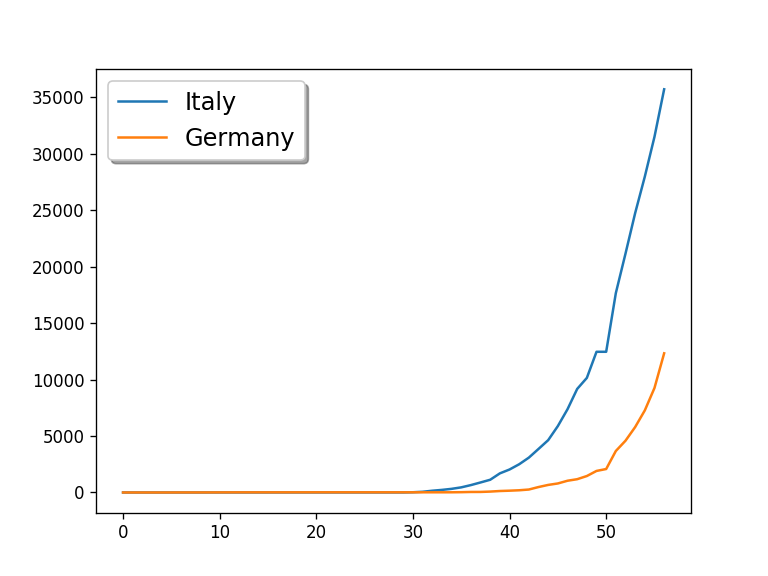

In [49]:
%matplotlib notebook
plotcountry(yC,['Italy','Germany'],0)

# 1D System